<a href="https://colab.research.google.com/github/DarkanCC/ProyectoModelos/blob/master/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
url = "https://drive.usercontent.google.com/download?id=1p3QoKtVJtyiRnZOddyS1ZAbaxGXoPqbi"

In [ ]:
data = pd.read_csv(url)
data = data[:100000]
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


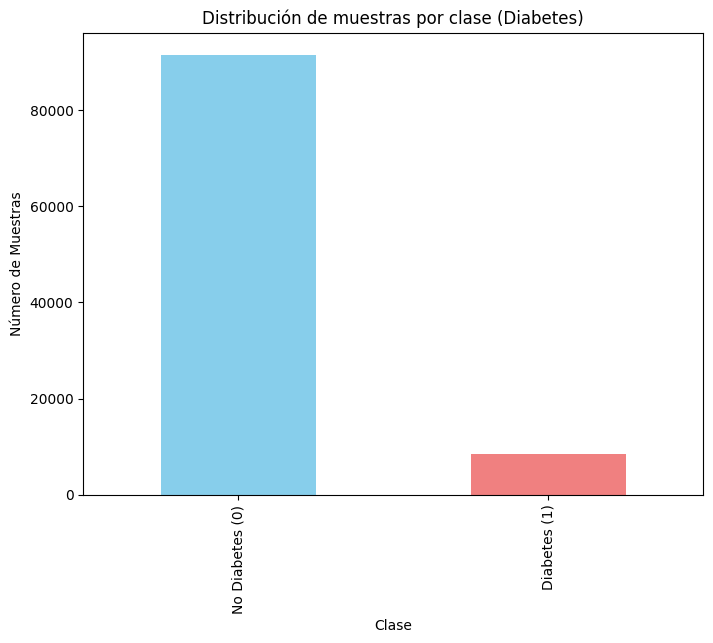

0    91500
1     8500
Name: diabetes, dtype: int64

In [ ]:
# Contar las muestras por clase
class_distribution = data['diabetes'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Distribución de muestras por clase (Diabetes)')
plt.xlabel('Clase')
plt.ylabel('Número de Muestras')
plt.xticks([0, 1], ['No Diabetes (0)', 'Diabetes (1)'])
plt.show()
data['diabetes'].value_counts()

In [ ]:
# Codificar las variables categóricas (gender y smoking_history) en números
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])
data['smoking_history'] = le.fit_transform(data['smoking_history'])

In [ ]:
data.shape
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [ ]:
# Dividir los datos en características (X) y salida (y)
X = data.drop('diabetes', axis=1)
y = data[['diabetes']]

In [ ]:
# Escalar las características
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
display(X)
display(y)

array([[-8.41046744e-01,  1.69270354e+00, -2.84439447e-01, ...,
        -3.21055792e-01,  1.00170572e+00,  4.77042159e-02],
       [-8.41046744e-01,  5.38006427e-01, -2.84439447e-01, ...,
        -1.15583678e-04,  1.00170572e+00, -1.42620999e+00],
       [ 1.18723364e+00, -6.16690686e-01, -2.84439447e-01, ...,
        -1.15583678e-04,  1.61108022e-01,  4.89878478e-01],
       ...,
       [ 1.18723364e+00,  1.07094356e+00, -2.84439447e-01, ...,
         7.67292549e-02,  1.61108022e-01,  4.16182767e-01],
       [-8.41046744e-01, -7.94336396e-01, -2.84439447e-01, ...,
         1.22036126e+00, -1.42668764e+00, -9.34905254e-01],
       [-8.41046744e-01,  6.71240710e-01, -2.84439447e-01, ...,
        -7.36921977e-01,  1.00170572e+00, -1.18055762e+00]])

,diabetes
0,0
1,0
2,0
3,0
4,0
...,...
99995,0
99996,0
99997,0
99998,0


In [ ]:
# Dividir 70% de los datos para entrenamiento y validacion, 30% para prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [ ]:
# Definir los hiperparámetros y sus valores posibles para cada modelo
param_grid_qda = {
    'reg_param': [0.1, 0.5, 1.0]
}

param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2]
}

param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly'],
    'gamma': [0.001, 0.01, 0.1]
}

In [ ]:
# Crear modelos para cada algoritmo
qda = QuadraticDiscriminantAnalysis() # Análisis discriminante Cuadrático
gb = GradientBoostingClassifier() # Gradiente Boosting Tree
svc = SVC() # Máquinas de Soporte Vectorial

# Crear objetos GridSearchCV para cada modelo con validación cruzada y medida de evaluación "Precisión"
grid_search_qda = GridSearchCV(qda, param_grid_qda, scoring='accuracy', cv=5)
grid_search_gb = GridSearchCV(gb, param_grid_gb, scoring='accuracy', cv=5)
grid_search_svc = GridSearchCV(svc, param_grid_svc, scoring='accuracy', cv=5)

# Lista de modelos y objetos de búsqueda de cuadrícula
models = [grid_search_qda, grid_search_gb, grid_search_svc]

In [ ]:
# Lista para almacenar la precisión de todos los modelos
accuracies = []

# Realizar la búsqueda de cuadrícula y calcular la precisión para cada modelo
for model in models:
    model.fit(X_train, np.ravel(y_train))
    display(pd.DataFrame(model.cv_results_)[["params", "mean_test_score",	"std_test_score"]])
    print("\n")


,params,mean_test_score,std_test_score
0,{'reg_param': 0.1},0.907229,0.002511
1,{'reg_param': 0.5},0.916700,0.001839
2,{'reg_param': 1.0},0.947371,0.002160


,params,mean_test_score,std_test_score
0,"{'learning_rate': 0.01, 'n_estimators': 50}",0.913971,0.000035
1,"{'learning_rate': 0.01, 'n_estimators': 100}",0.971700,0.000977
2,"{'learning_rate': 0.01, 'n_estimators': 200}",0.971700,0.000977
3,"{'learning_rate': 0.1, 'n_estimators': 50}",0.971686,0.001056
4,"{'learning_rate': 0.1, 'n_estimators': 100}",0.971957,0.001350
5,"{'learning_rate': 0.1, 'n_estimators': 200}",0.971743,0.001176
6,"{'learning_rate': 0.2, 'n_estimators': 50}",0.971900,0.001232
7,"{'learning_rate': 0.2, 'n_estimators': 100}",0.971771,0.001480
8,"{'learning_rate': 0.2, 'n_estimators': 200}",0.971329,0.001522


,params,mean_test_score,std_test_score
0,"{'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}",0.960571,0.001952
1,"{'C': 0.1, 'gamma': 0.001, 'kernel': 'poly'}",0.913971,0.000035
2,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}",0.960571,0.001952
3,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'poly'}",0.920329,0.000374
4,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}",0.960571,0.001952
5,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}",0.962000,0.001662
6,"{'C': 1, 'gamma': 0.001, 'kernel': 'linear'}",0.960543,0.001887
7,"{'C': 1, 'gamma': 0.001, 'kernel': 'poly'}",0.913971,0.000035
8,"{'C': 1, 'gamma': 0.01, 'kernel': 'linear'}",0.960543,0.001887
9,"{'C': 1, 'gamma': 0.01, 'kernel': 'poly'}",0.945257,0.001709


In [ ]:
# Índice del modelo Análisis Discriminante Cuadrático que se considera mejor
best_qda_index = 2

# Obtener el modelo en el índice especificado
selected_qda = grid_search_qda.cv_results_['params'][best_qda_index]

# Crear un nuevo modelo con los hiperparámetros seleccionados
qda_best_selected = QuadraticDiscriminantAnalysis(**selected_qda)

In [ ]:
# Índice del modelo Gradiente Boosting Tree que se considera mejor
best_gb_index = 3

# Obtener el modelo en el índice especificado
selected_gb = grid_search_gb.cv_results_['params'][best_gb_index]

# Crear un nuevo modelo con los hiperparámetros seleccionados
gb_best_selected = GradientBoostingClassifier(**selected_gb)

In [ ]:
# Índice del modelo Máquinas de Soporte Vectorial que se considera mejor
best_svc_index = 0

# Obtener el modelo en el índice especificado
selected_svc = grid_search_svc.cv_results_['params'][best_svc_index]

# Crear un nuevo modelo con los hiperparámetros seleccionados
svc_best_selected = SVC(**selected_svc)

In [ ]:
# Realizar el testeo para los mejores modelos
best_models = [qda_best_selected, gb_best_selected, svc_best_selected]

for i, model_name in enumerate(["Análisis Discriminante Cuadrático", "Gradiente Boosting Tree", "Máquinas de Soporte Vectorial"]):
    best_model = best_models[i]  # Obtén el mejor modelo para el algoritmo actual
    best_model.fit(X_train, np.ravel(y_train))
    y_pred = best_model.predict(X_test)  # Realiza las predicciones en el conjunto de prueba
    accuracy = accuracy_score(y_test, y_pred)  # Calcula la precisión en el conjunto de prueba
    print(f"Precisión para {model_name} en el conjunto de prueba: {accuracy}")


Precisión para Análisis Discriminante Cuadrático en el conjunto de prueba: 0.9485333333333333
Precisión para Gradiente Boosting Tree en el conjunto de prueba: 0.9722666666666666
Precisión para Máquinas de Soporte Vectorial en el conjunto de prueba: 0.9619333333333333
